In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# create a path

path = r'C:\Users\apiny\Documents\CareerFoundry\Data Immersion\4_Intro to Programming\Instacart Basket Analysis'

In [3]:
# import a dataframe

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_flag.pkl'))

<Axes: xlabel='orders_day_of_week'>

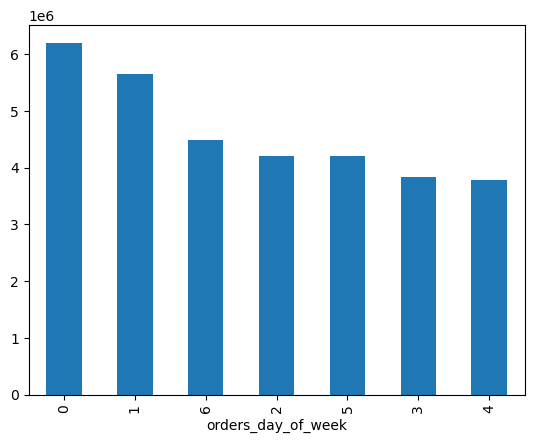

In [4]:
# create a bar chart

df['orders_day_of_week'].value_counts().plot.bar()

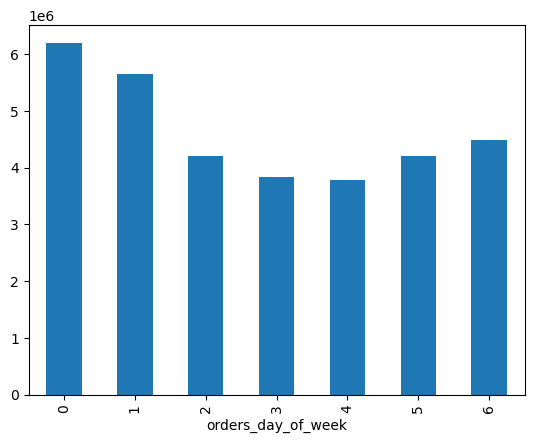

In [5]:
# sort the bars

bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar()

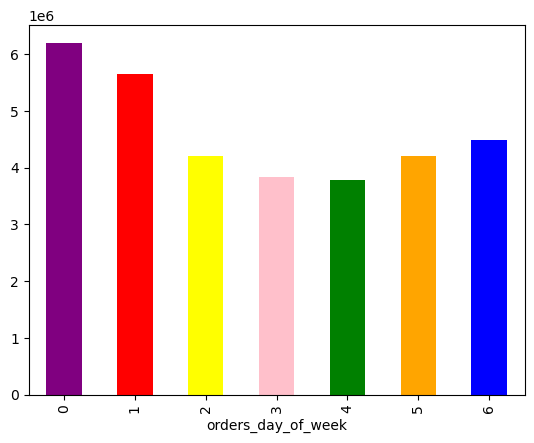

In [6]:
# add bar colors

bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple','red', 'yellow', 'pink', 'green', 'orange', 'blue'])

In [8]:
# export the chart as png file

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

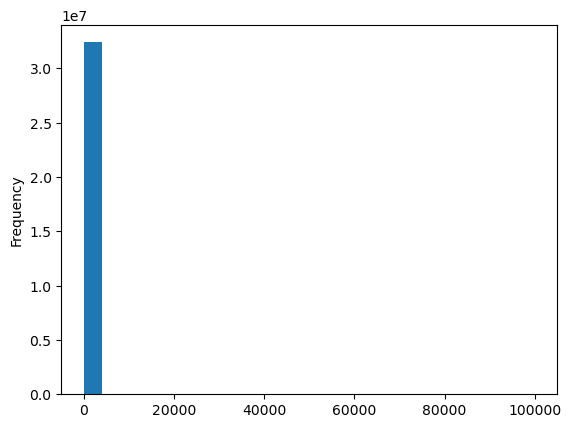

In [9]:
# create a histogram

df['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

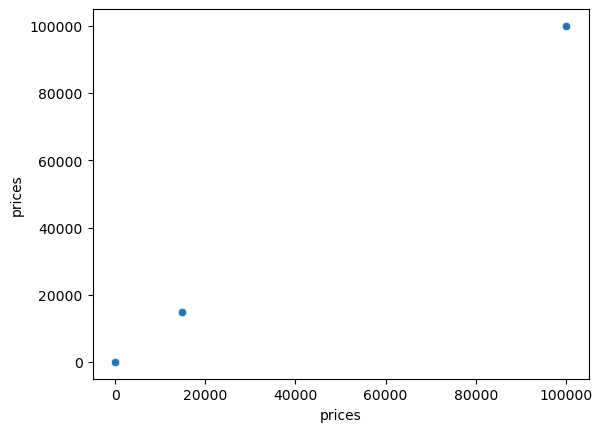

In [10]:
# create a scatterplot

sns.scatterplot(x = 'prices', y = 'prices', data = df)

In [11]:
# determine the outliers

df.loc[df['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,median_prior_order,order_frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,high-range product,Regularly busy,regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,high-range product,Regularly busy,regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,high-range product,Regularly busy,regularly busy,Fewest orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,high-range product,Busiest day,busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,high-range product,Regularly busy,busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,high-range product,Busiest day,busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,high-range product,Busiest day,busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,high-range product,Regularly busy,slowest days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,high-range product,Regularly busy,slowest days,Fewest orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [12]:
# mark the outliers (14,900 and 99,999) as missing values 'NaN' 
# !!this process should have been completed during data prep stages!!

df.loc[df['prices'] > 100, 'prices'] = np.nan

In [15]:
df['prices'].max()

25.0

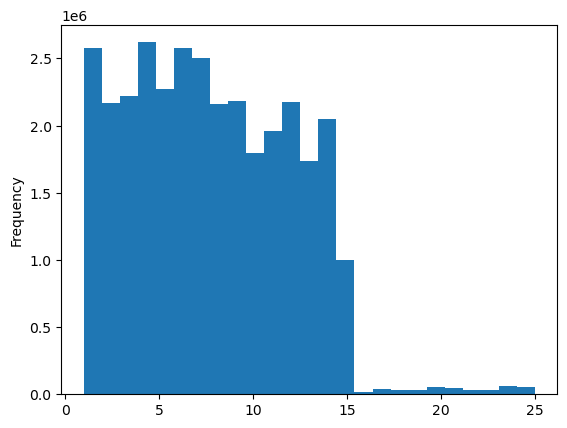

In [16]:
# create a histogram

hist = df['prices'].plot.hist(bins = 25)

<Axes: ylabel='Frequency'>

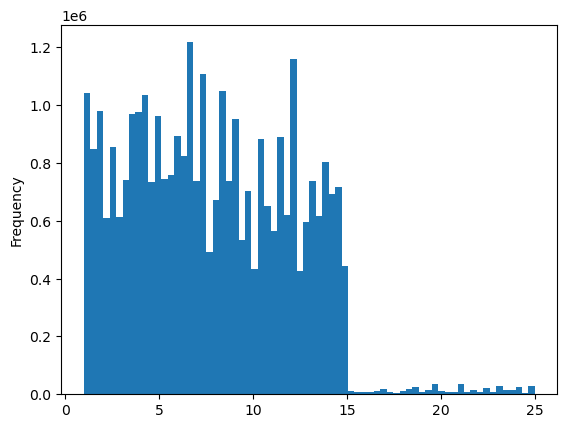

In [17]:
# increase the level of granularity 

df['prices'].plot.hist(bins = 70)

In [18]:
# create some random samples split into two dataframes at a 70/30 ratio
# create a list holding True/False values to the test np.random.rant() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [19]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [21]:
# store 70% of the sample in the dataframe big

big = df[dev]

In [22]:
# store 30% of the sample in the dataframe small

small = df[~dev]

In [23]:
# check number of rows

len(df)

32404859

In [24]:
len(big) + len(small)

32404859

In [25]:
# reduce the samples to only those columns necessary for the chart (to speed up the processing time)

df_2 = small[['orders_day_of_week', 'prices']]

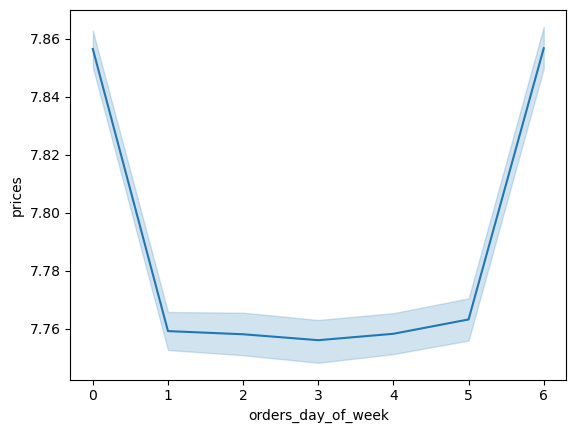

In [26]:
# create a line chart

line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')